mse_linear的mse最小时所需要的降维为6,均方误差最小为0.05721385179924242
mse_poly的mse最小时所需要的降维为26,均方误差最小为0.05356035511363637


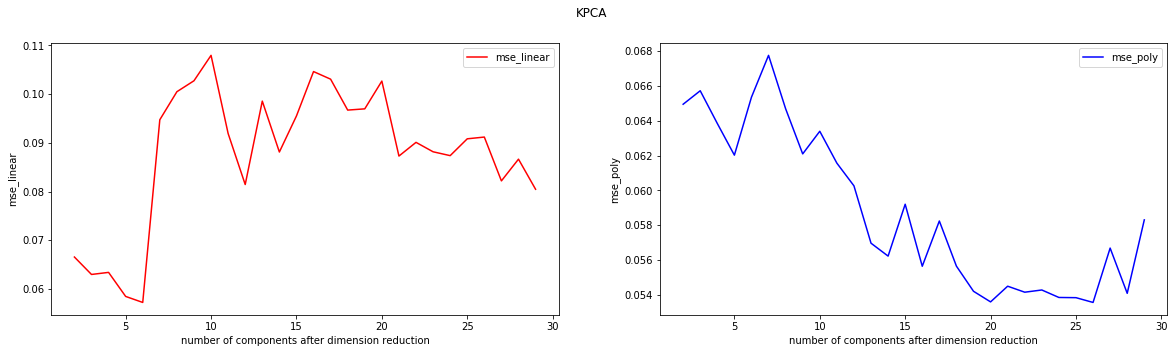

In [2]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
kernels=['linear','poly']
mse_linear = []
mse_poly = []
for i in kernels:
    for j in range(2,30):
        kpca=decomposition.KernelPCA(n_components=j,kernel=i)
        kpca = kpca.fit_transform(x)
        once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
        if i == "linear" :
            mse_linear.append(once * -1)
        if i == "poly" :
            mse_poly.append(once * -1)
      

color = ["red" , "blue"]       
fig = plt.figure(figsize=[20,5])
mse = [mse_linear , mse_poly ]
mse_char = ["mse_linear" , "mse_poly" ]
for i ,col in enumerate(mse) :
    ax = fig.add_subplot(1,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(2,30), col ,color = color[i] ,label = mse_char[i])
    ax.set_xlabel("number of components after dimension reduction")
    ax.set_ylabel(mse_char[i])
    ax.legend(loc="best")
    n = np.argmin(col)+2
    print("{}的mse最小时所需要的降维为{},均方误差最小为{}".format(mse_char[i],n,col[n-2]))
plt.suptitle("KPCA")
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\linear_or_poly.jpg")

gamma = 0.1的mse最小时所需要的降维为9,均方误差最小为0.05502408380681819
gamma = 0.5的mse最小时所需要的降维为9,均方误差最小为0.05689570075757575
gamma = 1的mse最小时所需要的降维为3,均方误差最小为0.0510348887310606
gamma = 4的mse最小时所需要的降维为7,均方误差最小为0.05635763020833334


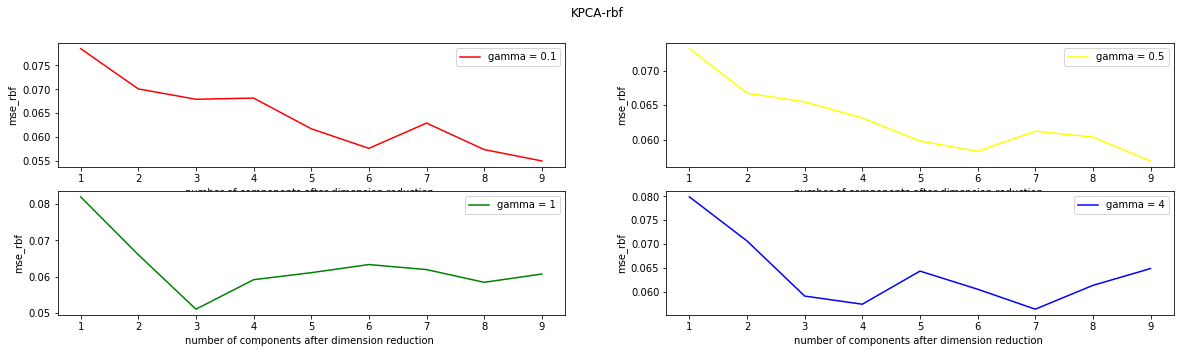

In [6]:
fig = plt.figure(figsize=[20,5])
colors = ["red" ,"yellow" ,"green" , "blue"]
Gammas=[0.1,0.5,1,4]
Gammas_char=["gamma = 0.1","gamma = 0.5","gamma = 1","gamma = 4"]# rbf 核的参数组成的列表。每个参数就是 gamma值
for i,gamma in enumerate(Gammas):
    mse_rbf = []
    for j in range(1,10):
        kpca=decomposition.KernelPCA(n_components=j,kernel='rbf',gamma=gamma)
        kpca = kpca.fit_transform(x)
        once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
        mse_rbf.append(once * -1)
    ax = fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(1,10), mse_rbf ,color = colors[i] ,label = Gammas_char[i])
    ax.set_xlabel("number of components after dimension reduction ")
    ax.set_ylabel("mse_rbf")
    ax.legend(loc="best")
    n = np.argmin(mse_rbf)+1
    print("{}的mse最小时所需要的降维为{},均方误差最小为{}".format(Gammas_char[i],n,mse_rbf[n-1]))
plt.suptitle("KPCA-rbf")
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\KPCA_rbf.jpg")

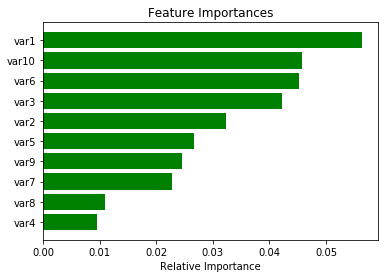

In [7]:
    
#####已经确定选用核函数为poly时用26个变量进行降维处理并导出#############    
    
kpca=decomposition.KernelPCA(n_components=26,kernel="poly")
kpca = kpca.fit_transform(x)
var_poly = ["var1","var2","var3","var4","var5","var6","var7","var8","var9"
       ,"var10","var11","var12","var13","var14","var15","var16","var7"
       ,"var18","var19","var20","var21","var22","var23","var24","var25"
       ,"var26"]
x_fe_poly = pd.DataFrame(kpca,columns = var_poly )
x_fe_poly.to_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
fit_26 = RFR(n_estimators=20,random_state= 0).fit(x_fe_poly,y)
features = x_fe_poly.columns
importances = fit_26.feature_importances_
indices = np.argsort(importances[0:10])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\Relative_Tmportance.jpg")

In [26]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
data = data.sort_values('id', ascending = False)


training_set = data.iloc[0:325 - 50, : ].values  # 前(325-50=275)天的数据作为训练集,表格从0开始计数
test_set = data.iloc[325 - 50: , : ].values  # 后50天的数据作为测试集

# 归一化
sc_x = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
sc_y = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled_x = sc_x.fit_transform(training_set[:,2:])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
training_set_scaled_y = sc_y.fit_transform(training_set[:,1:2])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set_x = sc_x.transform(test_set[:,2:])  # 利用训练集的属性对测试集进行归一化
test_set_y = sc_y.transform(test_set[:,1:2])  # 利用训练集的属性对测试集进行归一化

x_train = []
y_train = []

x_test = []
y_test = []

# 测试集：csv表格中前325-50=275个数据
# 利用for循环，遍历整个训练集，提取训练集中连续5天的26个降维新变量作为输入特征x_train，第6天的RON_LOSS作为标签，for循环共构建325-50-5=270组数据。

for i in range(5, len(training_set_scaled_x)):
    x_train.append(training_set_scaled_x[i - 5:i, :])
    y_train.append(training_set_scaled_y[i, :])
# 对训练集进行打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即270组数据；输入连续5个的26个降维新变量，预测出第6天的RON_LOSS，循环核时间展开步数为5; 每个时间步送入的特征是连续5天的26个降维新变量，有26个数据，故每个时间步输入特征个数为26
x_train = np.reshape(x_train, (x_train.shape[0], 5, 26))
# 测试集：csv表格中后50天数据
# 利用for循环，遍历整个测试集，提取测试集中连续5天的26个降维新变量作为输入特征x_train，第6天的数据作为RON_LOSS，for循环共构建50-5=45组数据。
for i in range(5, len(test_set_x)):
    x_test.append(test_set_x[i - 5 : i, :])
    y_test.append(test_set_y[i, :])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 5, 26))

model_RNN = tf.keras.Sequential([
    SimpleRNN(80, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(100),
    Dropout(0.2),
    Dense(1)
])

model_RNN.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')  # 损失函数用均方误差
# 该应用只观测loss数值，不观测准确率，所以删去metrics选项，一会在每个epoch迭代显示时只显示loss值
#C:\Users\Administrator\Desktop\
checkpoint_save_path = r"C:\Users\Administrator\Desktop\RNNcheckpoint\RNN_RON_LOSS.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

history = model_RNN.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model_RNN.summary()

Train on 270 samples, validate on 45 samples
Epoch 1/50
270/270 [==============================] - 2s 8ms/sample - loss: 1.0949 - val_loss: 0.0753
Epoch 2/50
270/270 [==============================] - 0s 178us/sample - loss: 0.7226 - val_loss: 0.1235
Epoch 3/50
270/270 [==============================] - 0s 182us/sample - loss: 0.4267 - val_loss: 0.2680
Epoch 4/50
270/270 [==============================] - 0s 174us/sample - loss: 0.4804 - val_loss: 0.1149
Epoch 5/50
270/270 [==============================] - 0s 713us/sample - loss: 0.3383 - val_loss: 0.0745
Epoch 6/50
270/270 [==============================] - 0s 694us/sample - loss: 0.2491 - val_loss: 0.0303
Epoch 7/50
270/270 [==============================] - 0s 196us/sample - loss: 0.2126 - val_loss: 0.0371
Epoch 8/50
270/270 [==============================] - 0s 704us/sample - loss: 0.2240 - val_loss: 0.0234
Epoch 9/50
270/270 [==============================] - 0s 211us/sample - loss: 0.1948 - val_loss: 0.0235
Epoch 10/50
270/270 [

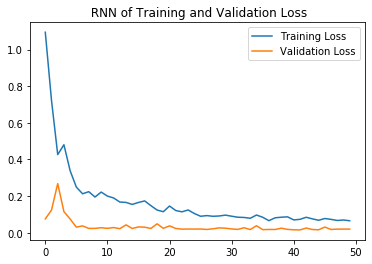

In [27]:
file = open('C:/Users/Administrator/Desktop/RNN_RON_LOSS_weights.txt', 'w' )  # 参数提取
for v in model_RNN.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title(' RNN of Training and Validation Loss')
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\RNN_Loss.jpg")

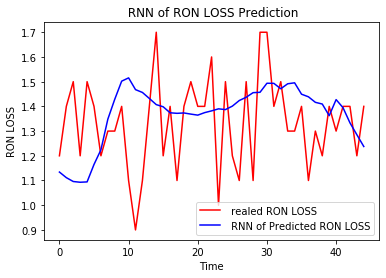

In [28]:
  
 #####看图######
################## predict ######################
# 测试集输入模型进行预测
predicted_RON_LOSS = model_RNN.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_RON_LOSS = sc_y.inverse_transform(predicted_RON_LOSS)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_RON_LOSS = sc_y.inverse_transform(y_test)
# 画出真实数据和预测数据的对比曲线
plt.plot(real_RON_LOSS, color='red', label=' realed RON LOSS')
plt.plot(predicted_RON_LOSS, color='blue', label=' RNN of Predicted RON LOSS')
plt.title(' RNN of RON LOSS Prediction')
plt.xlabel('Time')
plt.ylabel('RON LOSS')
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\RNN_predict.jpg")

In [29]:
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_RON_LOSS, real_RON_LOSS)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_RON_LOSS, real_RON_LOSS))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_RON_LOSS, real_RON_LOSS)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

均方误差: 0.050196
均方根误差: 0.224045
平均绝对误差: 0.178000


In [ ]:
#####LSTM

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, LSTM
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



data = pd.read_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
data = data.sort_values('id', ascending = False)


training_set = data.iloc[0:325 - 50, : ].values  #  前(325-50=275)天的数据作为训练集,表格从0开始计数
test_set = data.iloc[325 - 50: , : ].values  # 后50天的开盘价作为测试集

# 归一化
sc_x = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
sc_y = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled_x = sc_x.fit_transform(training_set[:,2:])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
training_set_scaled_y = sc_y.fit_transform(training_set[:,1:2])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set_x = sc_x.transform(test_set[:,2:])  # 利用训练集的属性对测试集进行归一化
test_set_y = sc_y.transform(test_set[:,1:2])  # 利用训练集的属性对测试集进行归一化

x_train = []
y_train = []

x_test = []
y_test = []


# 测试集：csv表格中前325-50=275个数据
# 利用for循环，遍历整个训练集，提取训练集中连续5天的26个降维新变量作为输入特征x_train，第6天的RON_LOSS作为标签，for循环共构建325-50-5=270组数据。

for i in range(5, len(training_set_scaled_x)):
    x_train.append(training_set_scaled_x[i - 5:i, :])
    y_train.append(training_set_scaled_y[i, :])
# 对训练集进行打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即270组数据；输入连续5个的26个降维新变量，预测出第6天的RON_LOSS，循环核时间展开步数为5; 每个时间步送入的特征是连续5天的26个降维新变量，有26个数据，故每个时间步输入特征个数为26
x_train = np.reshape(x_train, (x_train.shape[0], 5, 26))
# 测试集：csv表格中后50天数据
# 利用for循环，遍历整个测试集，提取测试集中连续5天的26个降维新变量作为输入特征x_train，第6天的数据作为RON_LOSS，for循环共构建50-5=45组数据。
for i in range(5, len(test_set_x)):
    x_test.append(test_set_x[i - 5 : i, :])
    y_test.append(test_set_y[i, :])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 5, 26))


model_LSTM = tf.keras.Sequential([
    LSTM(80, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)
])

model_LSTM.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')  # 损失函数用均方误差
# 该应用只观测loss数值，不观测准确率，所以删去metrics选项，一会在每个epoch迭代显示时只显示loss值
#C:\Users\Administrator\Desktop\
checkpoint_save_path = r"C:\Users\Administrator\Desktop\LSTMcheckpoint\LSTM_RON_LOSS.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

history = model_LSTM.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model_LSTM.summary()

Train on 270 samples, validate on 45 samples
Epoch 1/50
270/270 [==============================] - 5s 19ms/sample - loss: 0.2227 - val_loss: 0.0287
Epoch 2/50
270/270 [==============================] - 0s 1ms/sample - loss: 0.0793 - val_loss: 0.0244
Epoch 3/50
270/270 [==============================] - 0s 307us/sample - loss: 0.0386 - val_loss: 0.0372
Epoch 4/50
270/270 [==============================] - 0s 304us/sample - loss: 0.0470 - val_loss: 0.0298
Epoch 5/50
270/270 [==============================] - 0s 945us/sample - loss: 0.0323 - val_loss: 0.0146
Epoch 6/50
270/270 [==============================] - 0s 333us/sample - loss: 0.0310 - val_loss: 0.0156
Epoch 7/50
270/270 [==============================] - 0s 337us/sample - loss: 0.0280 - val_loss: 0.0157
Epoch 8/50
270/270 [==============================] - 0s 341us/sample - loss: 0.0266 - val_loss: 0.0194
Epoch 9/50
270/270 [==============================] - 0s 326us/sample - loss: 0.0260 - val_loss: 0.0168
Epoch 10/50
270/270 [=

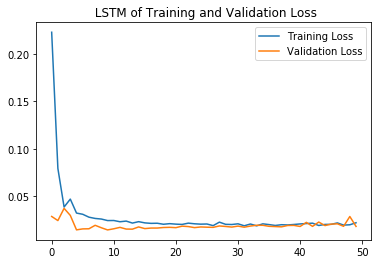

In [31]:
file = open('C:/Users/Administrator/Desktop/LSTM_RON_LOSS_weights.txt', 'w' )  # 参数提取
for v in model_LSTM.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title(' LSTM of Training and Validation Loss')
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\LSTM_Loss.jpg")

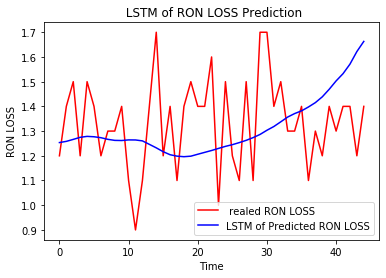

In [32]:
################## predict ######################
# 测试集输入模型进行预测
predicted_RON_LOSS = model_LSTM.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_RON_LOSS = sc_y.inverse_transform(predicted_RON_LOSS)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_RON_LOSS = sc_y.inverse_transform(y_test)
# 画出真实数据和预测数据的对比曲线
plt.plot(real_RON_LOSS, color='red', label=' realed RON LOSS')
plt.plot(predicted_RON_LOSS, color='blue', label='LSTM of Predicted RON LOSS')
plt.title(' LSTM of RON LOSS Prediction')
plt.xlabel('Time')
plt.ylabel('RON LOSS')
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\LSTM_predict.jpg")


In [33]:
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_RON_LOSS, real_RON_LOSS)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_RON_LOSS, real_RON_LOSS))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_RON_LOSS, real_RON_LOSS)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

均方误差: 0.046669
均方根误差: 0.216029
平均绝对误差: 0.182837


In [ ]:
#####RGU

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GRU
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


data = pd.read_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
data = data.sort_values('id', ascending = False)


training_set = data.iloc[0:325 - 50, : ].values  #  #  前(325-50=275)天的数据作为训练集,表格从0开始计数
test_set = data.iloc[325 - 50: , : ].values  # 后50天的数据作为测试集

# 归一化
sc_x = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
sc_y = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
training_set_scaled_x = sc_x.fit_transform(training_set[:,2:])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
training_set_scaled_y = sc_y.fit_transform(training_set[:,1:2])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set_x = sc_x.transform(test_set[:,2:])  # 利用训练集的属性对测试集进行归一化
test_set_y = sc_y.transform(test_set[:,1:2])  # 利用训练集的属性对测试集进行归一化

x_train = []
y_train = []

x_test = []
y_test = []

# 测试集：csv表格中前325-50=275个数据
# 利用for循环，遍历整个训练集，提取训练集中连续5天的26个降维新变量作为输入特征x_train，第6天的RON_LOSS作为标签，for循环共构建325-50-5=270组数据。

for i in range(5, len(training_set_scaled_x)):
    x_train.append(training_set_scaled_x[i - 5:i, :])
    y_train.append(training_set_scaled_y[i, :])
# 对训练集进行打乱
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即270组数据；输入连续5个的26个降维新变量，预测出第6天的RON_LOSS，循环核时间展开步数为5; 每个时间步送入的特征是连续5天的26个降维新变量，有26个数据，故每个时间步输入特征个数为26
x_train = np.reshape(x_train, (x_train.shape[0], 5, 26))
# 测试集：csv表格中后50天数据
# 利用for循环，遍历整个测试集，提取测试集中连续5天的26个降维新变量作为输入特征x_train，第6天的RON_LOSS作为标签，for循环共构建50-5=45组数据。
for i in range(5, len(test_set_x)):
    x_test.append(test_set_x[i - 5 : i, :])
    y_test.append(test_set_y[i, :])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], 5, 26))

model_GRU = tf.keras.Sequential([
    GRU(80, return_sequences=True),
    Dropout(0.2),
    GRU(100),
    Dropout(0.2),
    Dense(1)
])

model_GRU.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error')  # 损失函数用均方误差
# 该应用只观测loss数值，不观测准确率，所以删去metrics选项，一会在每个epoch迭代显示时只显示loss值
#C:\Users\Administrator\Desktop\
checkpoint_save_path = r"C:\Users\Administrator\Desktop\GRUcheckpoint\GRU_RON_LOSS.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='val_loss')

history = model_GRU.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

model_GRU.summary()


Train on 270 samples, validate on 45 samples
Epoch 1/50
270/270 [==============================] - 6s 20ms/sample - loss: 0.1883 - val_loss: 0.1022
Epoch 2/50
270/270 [==============================] - 0s 960us/sample - loss: 0.1086 - val_loss: 0.0312
Epoch 3/50
270/270 [==============================] - 0s 322us/sample - loss: 0.0586 - val_loss: 0.0766
Epoch 4/50
270/270 [==============================] - 0s 1ms/sample - loss: 0.0486 - val_loss: 0.0192
Epoch 5/50
270/270 [==============================] - 0s 315us/sample - loss: 0.0397 - val_loss: 0.0193
Epoch 6/50
270/270 [==============================] - 0s 322us/sample - loss: 0.0380 - val_loss: 0.0250
Epoch 7/50
270/270 [==============================] - 0s 315us/sample - loss: 0.0329 - val_loss: 0.0359
Epoch 8/50
270/270 [==============================] - 0s 385us/sample - loss: 0.0304 - val_loss: 0.0220
Epoch 9/50
270/270 [==============================] - 0s 1ms/sample - loss: 0.0271 - val_loss: 0.0188
Epoch 10/50
270/270 [===

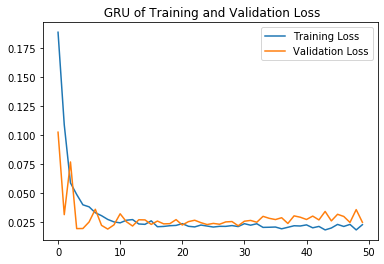

In [36]:
file = open('C:/Users/Administrator/Desktop/GRU_RON_LOSS_weights.txt', 'w' )  # 参数提取
for v in model_GRU.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title(' GRU of Training and Validation Loss')
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\GRU_Loss.jpg")

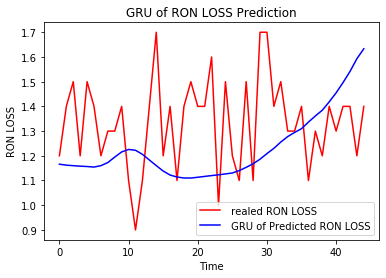

In [37]:
################## predict ######################
# 测试集输入模型进行预测
predicted_RON_LOSS = model_GRU.predict(x_test)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_RON_LOSS = sc_y.inverse_transform(predicted_RON_LOSS)
# 对真实数据还原---从（0，1）反归一化到原始范围
real_RON_LOSS = sc_y.inverse_transform(y_test)
# 画出真实数据和预测数据的对比曲线
plt.plot(real_RON_LOSS, color='red', label=' realed RON LOSS')
plt.plot(predicted_RON_LOSS, color='blue', label=' GRU of Predicted RON LOSS')
plt.title('GRU of RON LOSS Prediction')
plt.xlabel('Time')
plt.ylabel('RON LOSS')
plt.legend()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\GRU_Lpredict.jpg")

In [38]:
##########evaluate##############
# calculate MSE 均方误差 ---> E[(预测值-真实值)^2] (预测值减真实值求平方后求均值)
mse = mean_squared_error(predicted_RON_LOSS, real_RON_LOSS)
# calculate RMSE 均方根误差--->sqrt[MSE]    (对均方误差开方)
rmse = math.sqrt(mean_squared_error(predicted_RON_LOSS, real_RON_LOSS))
# calculate MAE 平均绝对误差----->E[|预测值-真实值|](预测值减真实值求绝对值后求均值）
mae = mean_absolute_error(predicted_RON_LOSS, real_RON_LOSS)
print('均方误差: %.6f' % mse)
print('均方根误差: %.6f' % rmse)
print('平均绝对误差: %.6f' % mae)

均方误差: 0.063111
均方根误差: 0.251219
平均绝对误差: 0.203784


In [58]:
######用神经网络预测全部样本值

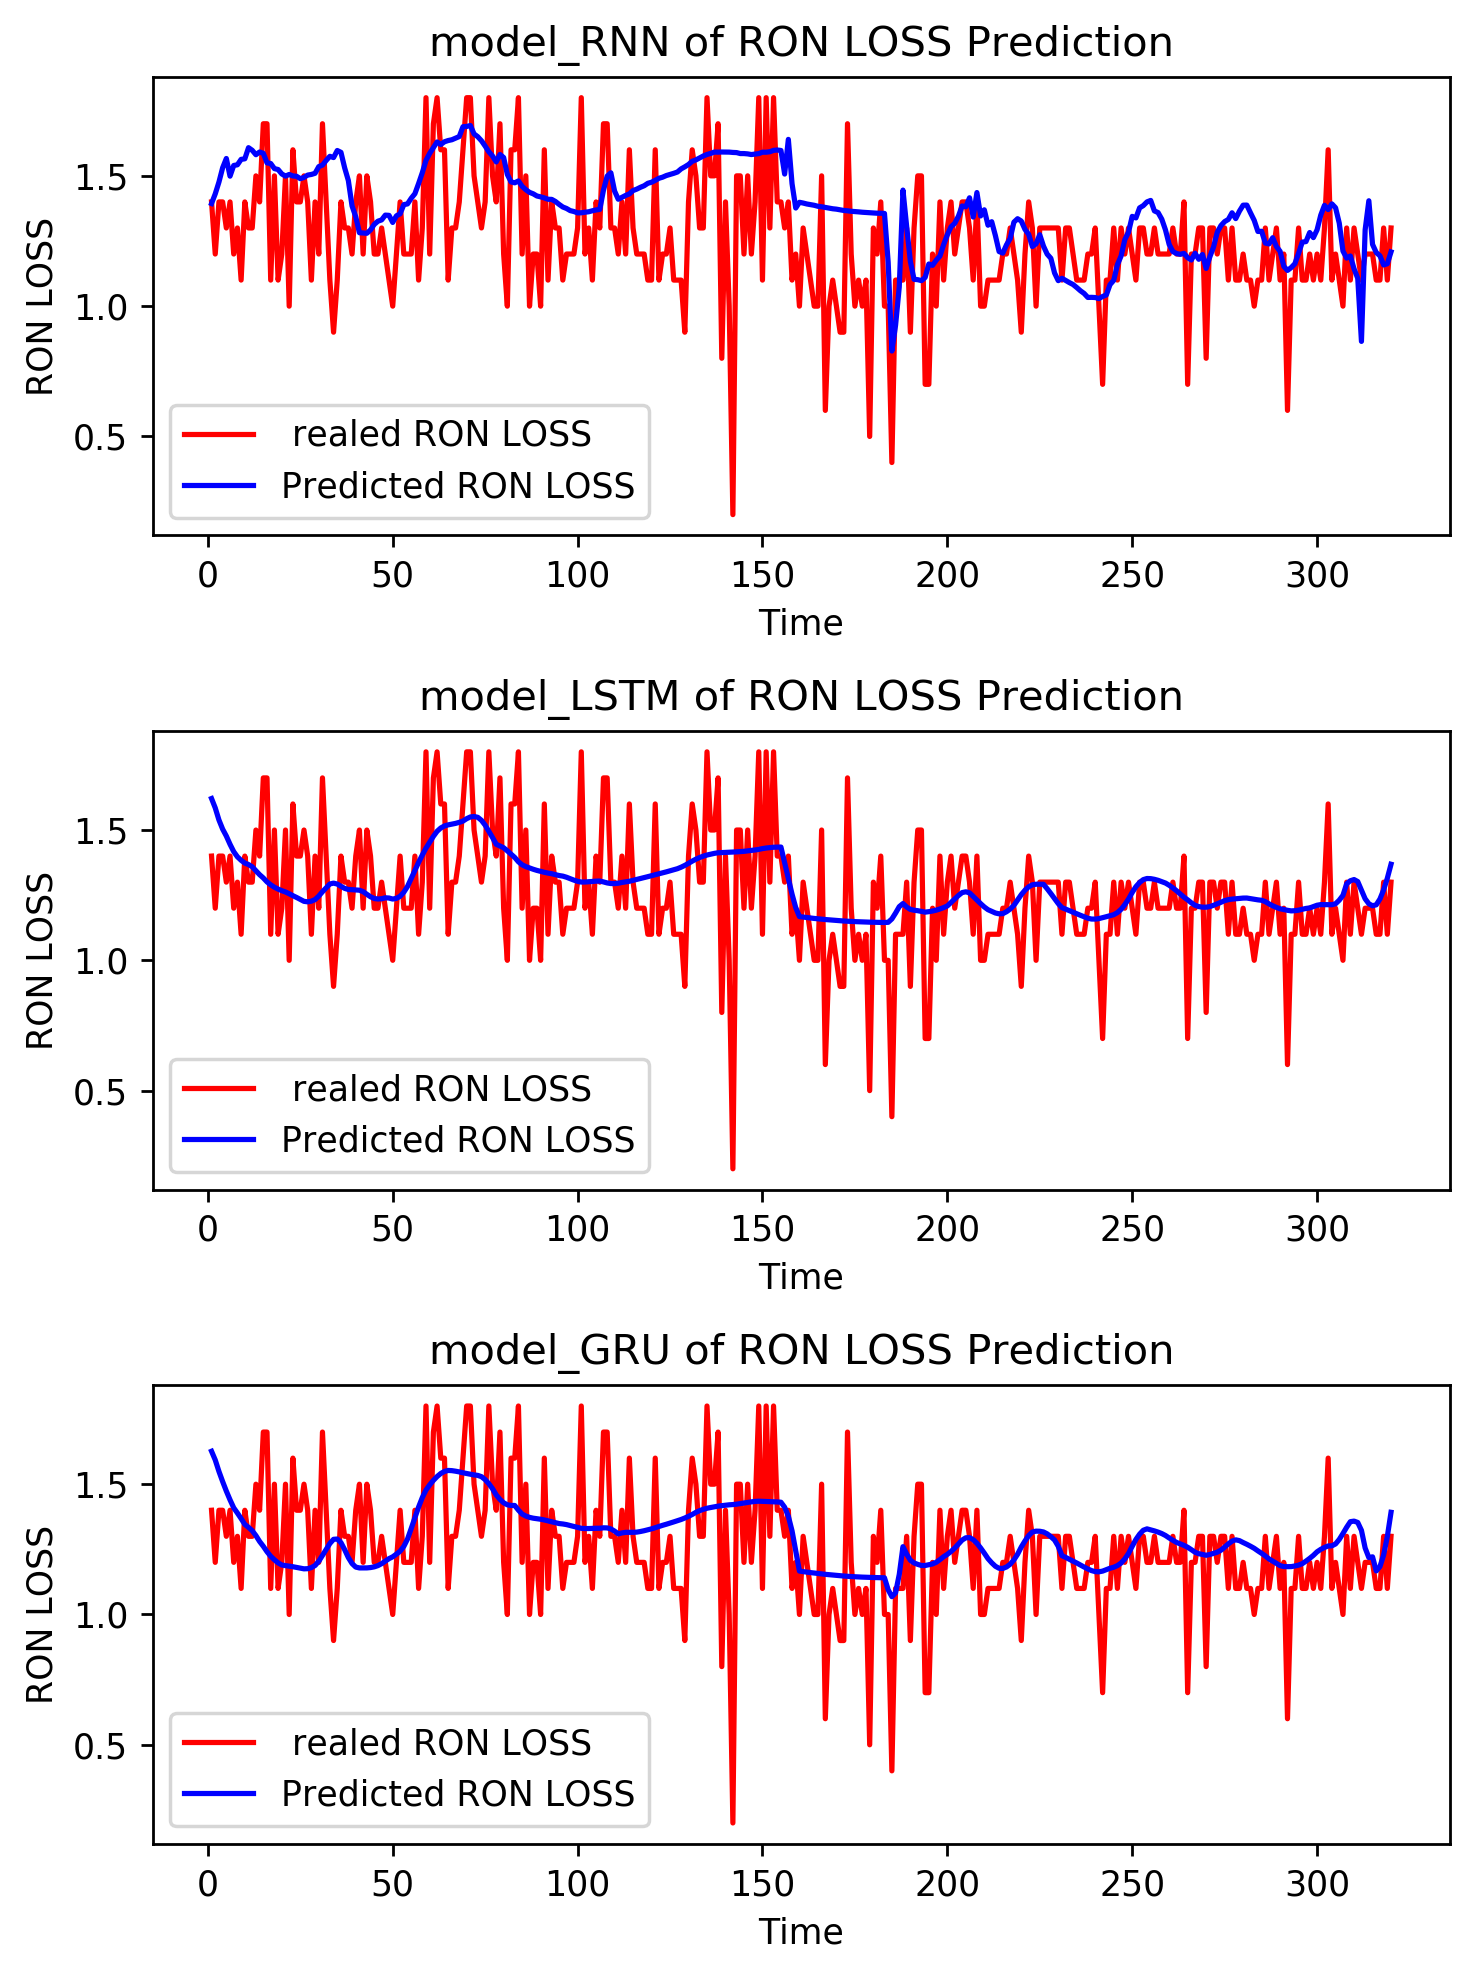

In [91]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
data = data.sort_values('id', ascending = False)
all_samples = data.iloc[: , : ].values  # 所有样本的特征作为测试集

# 归一化
sc_x = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
sc_y = MinMaxScaler(feature_range=(0, 1))  # 定义归一化：归一化到(0，1)之间
test_set_scaled_x = sc_x.fit_transform(all_samples[:,2:])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化
test_set_scaled_y = sc_y.fit_transform(all_samples[:,1:2])  # 求得训练集的最大值，最小值这些训练集固有的属性，并在训练集上进行归一化

x_test = []
y_test = []

for i in range(5, len(test_set_scaled_x)):
    x_test.append(test_set_scaled_x[i - 5:i, :])
    y_test.append(test_set_scaled_x[i, :])

# 将训练集由list格式变为array格式
x_test, y_test = np.array(x_test), np.array(y_test)

x_test = np.reshape(x_test, (x_test.shape[0], 5, 26))

################## predict ######################
# 测试集输入模型进行预测
m = ["model_RNN" , "model_LSTM" , "model_GRU"] 
f = [model_RNN , model_LSTM , model_GRU]
fig = plt.figure(figsize = (6,8) , dpi = 250 )
for i , k in enumerate(f) :
    predicted_RON_LOSS = k.predict(x_test)
    # 对预测数据还原---从（0，1）反归一化到原始范围
    predicted_RON_LOSS = sc_y.inverse_transform(predicted_RON_LOSS)
    # 对真实数据还原---从（0，1）反归一化到原始范围
    real_RON_LOSS = all_samples[5:,1:2]

    # 画出真实数据和预测数据的对比曲线
    plt.subplot(3,1,i+1)
    plt.plot(range(320,0,-1),real_RON_LOSS.ravel(), color='red', label=' realed RON LOSS')
    plt.plot(range(320,0,-1),predicted_RON_LOSS.ravel(), color='blue', label='Predicted RON LOSS')
    plt.title('{} of RON LOSS Prediction'.format(m[i]))
    plt.xlabel('Time')
    plt.ylabel('RON LOSS')
    plt.legend(loc = "best")
    real_RON_LOSS = pd.DataFrame(real_RON_LOSS )
    predicted_RON_LOSS = pd.DataFrame(predicted_RON_LOSS)
    w = pd.concat([real_RON_LOSS,predicted_RON_LOSS] ,axis = 1)
    w.to_csv(r"C:\Users\Administrator\Desktop\{}_RON_VS_Pre.csv".format(m[i]))
fig.tight_layout()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\all_samples_predict.jpg")

In [ ]:
####随机森林预测全部样本

E:\environment\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\environment\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\environment\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\environment\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

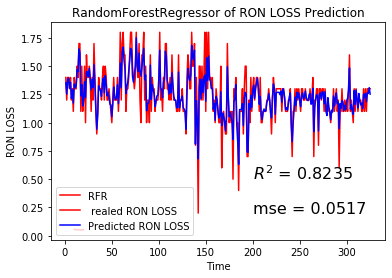

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
x = data.iloc[:,2:]
y = data.iloc[:,1:2]
error = []
for i in range(10,21):
    regressor = RandomForestRegressor(n_estimators=i,random_state=0)
    mse = cross_val_score(regressor, x, y, cv=10,scoring = "neg_mean_squared_error").mean()
    mse = mse * -1
    error.append(mse)
plt.plot(range(10,21),error,color = "red" ,label = "RFR")
plt.xlabel("n_estimators")
plt.ylabel("error")
plt.legend(loc = "best")

####选择均方误差最小时的随机树的棵树#####
regressor = RandomForestRegressor(n_estimators=19,random_state=0)

#####用n_estimatirs = 19 来拟合RON_LOSS

rg = regressor.fit(x , y)
y_hat = rg.predict(x)
R = rg.score(x,y)
y_hat.shape
mse_19 = cross_val_score(regressor, x, y, cv=10,scoring = "neg_mean_squared_error").mean()
mse_19 = mse_19 * -1
plt.plot(range(1,326,1),y, color='red', label=' realed RON LOSS')
plt.plot(range(1,326,1),y_hat, color='blue', label='Predicted RON LOSS')
plt.title('RandomForestRegressor of RON LOSS Prediction')
plt.annotate('mse = {}'.format(round(mse,4)),xy=(200,0.2),xytext=(200,0.2),fontsize=16)
plt.annotate('$R^2$ = {}'.format(round(R,4)),xy=(200,0.5),xytext=(200,0.5),fontsize=16)
plt.xlabel('Time')
plt.ylabel('RON LOSS')
plt.legend(loc = 3)
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\all_samples_predict_RFR.jpg")


0.8234993948784131

In [10]:
import pandas as pd
data_LSTM_RON = pd.read_csv(r"C:\Users\Administrator\Desktop\model_LSTM_RON_VS_Pre.csv")
dd = data_LSTM_RON.sort_values('id')

dd.to_csv(r"C:\Users\Administrator\Desktop\RON.csv", index = None)

data_ps = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv").iloc[:320,9:10]
data_ps.shape

RON=pd.read_csv(r"C:\Users\Administrator\Desktop\RON.csv")
RON.shape

data_var = pd.read_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv").iloc[:320,2:]
data_var.shape

p = pd.concat([RON,data_ps,data_var] ,axis = 1)

p.drop(columns = p.columns[0] , inplace = True)

p.head()
p.to_csv(r"C:\Users\Administrator\Desktop\four_solve.csv" )

In [11]:
p.head()

,real_RON_LOSS,predicted_RON_LOSS,P_S,var1,var2,var3,var4,var5,var6,var7,...,var7.1,var18,var19,var20,var21,var22,var23,var24,var25,var26
0,1.4,1.620837,3.2,-4.410000e+19,-9.270000e+19,4.640000e+19,1.740000e+19,-2.110000e+18,5.750000e+18,1.290000e+18,...,5.790000e+16,1.130000e+16,-2.850000e+15,-6.090000e+15,5.750000e+16,-8.060000e+15,-5.820000e+16,-6.790000e+15,8.110000e+16,2.880000e+15
1,1.2,1.584955,3.2,-4.640000e+19,-9.020000e+19,4.500000e+19,1.680000e+19,-2.100000e+18,5.320000e+18,1.320000e+18,...,6.250000e+16,3.370000e+15,1.570000e+16,1.170000e+14,3.520000e+16,1.690000e+16,-4.600000e+16,3.610000e+15,6.620000e+16,6.350000e+15
2,1.4,1.538625,3.2,-4.740000e+19,-8.910000e+19,4.440000e+19,1.660000e+19,-2.090000e+18,5.120000e+18,1.310000e+18,...,5.850000e+16,4.240000e+15,1.510000e+16,-1.140000e+15,3.070000e+16,1.830000e+16,-3.950000e+16,4.190000e+15,5.770000e+16,6.170000e+15
3,1.4,1.503481,3.2,-4.960000e+19,-8.660000e+19,4.300000e+19,1.610000e+19,-2.070000e+18,4.640000e+18,1.310000e+18,...,4.860000e+16,1.140000e+16,1.220000e+16,-7.100000e+15,1.990000e+16,2.300000e+16,-2.220000e+16,6.560000e+15,3.270000e+16,4.740000e+15
4,1.3,1.476863,3.2,-5.060000e+19,-8.560000e+19,4.240000e+19,1.580000e+19,-2.050000e+18,4.430000e+18,1.300000e+18,...,4.530000e+16,1.430000e+16,8.190000e+15,-1.130000e+16,1.730000e+16,2.280000e+16,-1.560000e+16,6.430000e+15,2.380000e+16,3.330000e+15


In [9]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   real_RON_LOSS       320 non-null    float64
 1   predicted_RON_LOSS  320 non-null    float64
 2   P_S                 320 non-null    float64
 3   var1                320 non-null    float64
 4   var2                320 non-null    float64
 5   var3                320 non-null    float64
 6   var4                320 non-null    float64
 7   var5                320 non-null    float64
 8   var6                320 non-null    float64
 9   var7                320 non-null    float64
 10  var8                320 non-null    float64
 11  var9                320 non-null    float64
 12  var10               320 non-null    float64
 13  var11               320 non-null    float64
 14  var12               320 non-null    float64
 15  var13               320 non-null    float64
 16  var14   

In [182]:
n = 0
condition_sample = []
for i in range(p.shape[0]):
    if p.iloc[i,3] <= 5:
        n+=1
        sample = p.iloc[i ,0 ]
        sample = int(sample)
        condition_sample.append(sample)
condition_sample
n

264

In [184]:
xx = []
for i in condition_sample:
    xx.append(p.iloc[i-1,:])
xxx = pd.DataFrame(xx)
xxx

,id,real_RON_LOSS,predicted_RON_LOSS,P_S,var1,var2,var3,var4,var5,var6,...,var7.1,var18,var19,var20,var21,var22,var23,var24,var25,var26
0,1.0,1.4,1.620837,3.2,-4.410000e+19,-9.270000e+19,4.640000e+19,1.740000e+19,-2.110000e+18,5.750000e+18,...,5.790000e+16,1.130000e+16,-2.850000e+15,-6.090000e+15,5.750000e+16,-8.060000e+15,-5.820000e+16,-6.790000e+15,8.110000e+16,2.880000e+15
1,2.0,1.2,1.584955,3.2,-4.640000e+19,-9.020000e+19,4.500000e+19,1.680000e+19,-2.100000e+18,5.320000e+18,...,6.250000e+16,3.370000e+15,1.570000e+16,1.170000e+14,3.520000e+16,1.690000e+16,-4.600000e+16,3.610000e+15,6.620000e+16,6.350000e+15
2,3.0,1.4,1.538625,3.2,-4.740000e+19,-8.910000e+19,4.440000e+19,1.660000e+19,-2.090000e+18,5.120000e+18,...,5.850000e+16,4.240000e+15,1.510000e+16,-1.140000e+15,3.070000e+16,1.830000e+16,-3.950000e+16,4.190000e+15,5.770000e+16,6.170000e+15
3,4.0,1.4,1.503481,3.2,-4.960000e+19,-8.660000e+19,4.300000e+19,1.610000e+19,-2.070000e+18,4.640000e+18,...,4.860000e+16,1.140000e+16,1.220000e+16,-7.100000e+15,1.990000e+16,2.300000e+16,-2.220000e+16,6.560000e+15,3.270000e+16,4.740000e+15
4,5.0,1.3,1.476863,3.2,-5.060000e+19,-8.560000e+19,4.240000e+19,1.580000e+19,-2.050000e+18,4.430000e+18,...,4.530000e+16,1.430000e+16,8.190000e+15,-1.130000e+16,1.730000e+16,2.280000e+16,-1.560000e+16,6.430000e+15,2.380000e+16,3.330000e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310.0,1.3,1.309979,3.2,4.660000e+19,4.800000e+19,-2.050000e+19,3.170000e+19,1.010000e+19,-1.700000e+18,...,3.320000e+16,-1.770000e+16,2.860000e+16,-5.440000e+16,-4.780000e+16,-2.680000e+16,-9.120000e+15,-1.930000e+15,2.840000e+15,5.730000e+15
314,315.0,1.2,1.209297,3.3,3.890000e+19,1.240000e+20,1.270000e+20,-9.600000e+18,-2.980000e+18,1.080000e+18,...,1.900000e+17,4.490000e+16,3.060000e+17,2.300000e+16,1.280000e+17,-2.100000e+16,-4.930000e+16,-1.100000e+17,-6.200000e+16,4.080000e+16
317,318.0,1.3,1.270299,3.3,3.240000e+19,1.230000e+20,1.240000e+20,-7.630000e+18,-1.370000e+18,4.390000e+17,...,-6.550000e+16,-1.480000e+16,-1.030000e+17,-3.070000e+15,-4.140000e+16,1.700000e+16,-6.060000e+15,-2.790000e+15,1.420000e+15,1.130000e+15
318,319.0,1.1,1.315057,3.3,3.060000e+19,1.230000e+20,1.230000e+20,-7.010000e+18,-8.890000e+17,2.520000e+17,...,-5.280000e+16,-1.120000e+16,-1.110000e+17,-6.400000e+14,-5.570000e+16,4.020000e+16,-3.250000e+16,-3.660000e+16,-3.580000e+15,3.100000e+14


In [195]:
xxx['diff'] = xxx.iloc[:,1].diff()
xxx.head()

,id,real_RON_LOSS,predicted_RON_LOSS,P_S,var1,var2,var3,var4,var5,var6,...,var18,var19,var20,var21,var22,var23,var24,var25,var26,diff
0,1.0,1.4,1.620837,3.2,-4.410000e+19,-9.270000e+19,4.640000e+19,1.740000e+19,-2.110000e+18,5.750000e+18,...,1.130000e+16,-2.850000e+15,-6.090000e+15,5.750000e+16,-8.060000e+15,-5.820000e+16,-6.790000e+15,8.110000e+16,2.880000e+15,NaN
1,2.0,1.2,1.584955,3.2,-4.640000e+19,-9.020000e+19,4.500000e+19,1.680000e+19,-2.100000e+18,5.320000e+18,...,3.370000e+15,1.570000e+16,1.170000e+14,3.520000e+16,1.690000e+16,-4.600000e+16,3.610000e+15,6.620000e+16,6.350000e+15,-0.2
2,3.0,1.4,1.538625,3.2,-4.740000e+19,-8.910000e+19,4.440000e+19,1.660000e+19,-2.090000e+18,5.120000e+18,...,4.240000e+15,1.510000e+16,-1.140000e+15,3.070000e+16,1.830000e+16,-3.950000e+16,4.190000e+15,5.770000e+16,6.170000e+15,0.2
3,4.0,1.4,1.503481,3.2,-4.960000e+19,-8.660000e+19,4.300000e+19,1.610000e+19,-2.070000e+18,4.640000e+18,...,1.140000e+16,1.220000e+16,-7.100000e+15,1.990000e+16,2.300000e+16,-2.220000e+16,6.560000e+15,3.270000e+16,4.740000e+15,0.0
4,5.0,1.3,1.476863,3.2,-5.060000e+19,-8.560000e+19,4.240000e+19,1.580000e+19,-2.050000e+18,4.430000e+18,...,1.430000e+16,8.190000e+15,-1.130000e+16,1.730000e+16,2.280000e+16,-1.560000e+16,6.430000e+15,2.380000e+16,3.330000e+15,-0.1


In [193]:
np.diff(cc)

array([1, 6])